**O Notebook Jupyter** é uma ferramenta incrivelmente poderosa para desenvolver e apresentar projetos de ciência de dados de forma interativa. 

Você possui um caderno que integra o código e sua saída em um único documento que combina visualizações, textos narrativos, equações matemáticas e outras mídias. 

O fluxo de trabalho intuitivo promove um desenvolvimento iterativo e rápido, tornando os notebooks uma escolha cada vez mais popular entre os cientistas de dados contemporâneos, e cada vez mais comum na ciência em geral. 



**Aqui podemos suportar:**

Tipos de dados
Numbers
Strings
Print
Listas
Dicionários
Boleanos
Tuplas
Sets
Operadores de comparação
if,elif, else
for Loops
while Loops
range()
list comprehension
funções
expressões lamda
map e filter
métodos

## Importações e Configuração das bibliotecas

Importamos pandas para trabalhar com nossos dados, Matplotlib para traçar gráficos, Seaborn e Ploty para tornar nossos gráficos mais bonitos. 

Também é comum importar o NumPy,  e essa primeira linha de baixo não é um comando do Python, mas usa algo chamado line magic para instruir o Jupyter a capturar plots do Matplotlib e renderizá-los na saída da célula; Este é um dos vários recursos avançados que estão fora do escopo deste meetup.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Vamos lá!! 
para ficar mais legível df é como chamaremos o DataFrame, vamos iniciar lendo nosso conjunto de dados:

Então, digamos que você seja um analista de dados e tenha sido encarregado de descobrir como os lucros das maiores empresas dos EUA mudaram historicamente. Você encontra um conjunto de dados de empresas da Fortune 500 que abrangem mais de 50 anos desde a primeira publicação da lista, em 1955

In [3]:
df = pd.read_csv('fortune500.csv')

**Investigando nosso conjunto de dados**

Agora estamo prontos! Nosso notebook ta salvo e nós carregamos nosso conjunto de dados no df essa é a estrutura de dados de pandas mais usada, que é chamada de DataFrame e basicamente se parece com uma tabela. 

In [6]:
df.head()

Year  Rank           Company  Revenue (in millions) Profit (in millions)
0  1955     1    General Motors                 9823.5                  806
1  1955     2       Exxon Mobil                 5661.4                584.8
2  1955     3        U.S. Steel                 3250.4                195.4
3  1955     4  General Electric                 2959.1                212.6
4  1955     5            Esmark                 2510.8                 19.1

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25500 entries, 0 to 25499
Data columns (total 5 columns):
Year                     25500 non-null int64
Rank                     25500 non-null int64
Company                  25500 non-null object
Revenue (in millions)    25500 non-null float64
Profit (in millions)     25500 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 996.2+ KB


In [8]:
df.tail()

Year  Rank                Company  Revenue (in millions)  \
25495  2005   496        Wm. Wrigley Jr.                 3648.6   
25496  2005   497         Peabody Energy                 3631.6   
25497  2005   498  Wendy's International                 3630.4   
25498  2005   499     Kindred Healthcare                 3616.6   
25499  2005   500   Cincinnati Financial                 3614.0   

      Profit (in millions)  
25495                  493  
25496                175.4  
25497                 57.8  
25498                 70.6  
25499                  584

Parece bom. Temos as colunas de que precisamos e cada linha corresponde a uma única empresa em um único ano.

Vamos apenas renomear algumas colunas para que possamos nos referir a elas mais tarde.

In [9]:
df.columns = ['year', 'rank', 'company', 'revenue', 'profit']

Em seguida,verificamos se nosso conjunto de dados ta completo e se pandas agiu como esperado e se algum valor está faltando.

In [4]:
len(df)

25500

Ok,então temos 500 linhas para cada ano, de 1955 a 2005.

Uma verificação simples é verificar se os tipos de dados (ou tipos) foram interpretados corretamente.

In [11]:
df.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit      object
dtype: object

Há algo errado com a coluna de lucros - esperamos que seja uma float64, como a coluna de receita.
Isso indica que provavelmente contém alguns valores não inteiros, então vamos dar uma olhada.

In [12]:
#Mapear
non_numberic_profits = df.profit.str.contains('[^0-9.-]')

#Localizar
df.loc[non_numberic_profits].head() 

year  rank                company  revenue profit
228  1955   229                 Norton    135.0   N.A.
290  1955   291        Schlitz Brewing    100.0   N.A.
294  1955   295  Pacific Vegetable Oil     97.9   N.A.
296  1955   297     Liebmann Breweries     96.0   N.A.
352  1955   353     Minneapolis-Moline     77.4   N.A.

Alguns dos valores são strings, que foram usados para indicar dados ausentes. 

In [11]:
set(df.profit[non_numberic_profits])

{'N.A.'}

Isso facilita a interpretação, mas o que devemos fazer? Bem, isso depende de quantos valores estão faltando.

In [12]:
#contar/ver tamanho
len(df.profit[non_numberic_profits])

369

É uma pequena fração do nosso conjunto de dados, embora não seja completamente inconsequente, pois ainda está em torno de 1,5%.

Se linhas contendo N.A são distribuídas uniformemente ao longo dos anos, a solução mais fácil seria simplesmente removê-las. 

Então, vamos dar uma olhada rápida na distribuição dos dados.

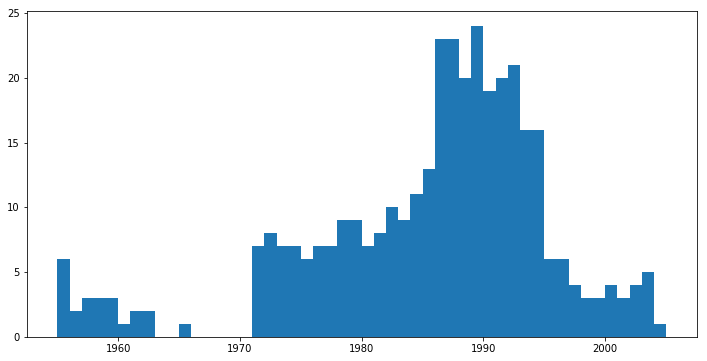

In [13]:
plt.figure(figsize=(12, 6))

bin_sizes, _, _ = plt.hist(df.year[non_numberic_profits], bins=range(1955, 2006))

Olhando brevemente, podemos ver que os valores mais inválidos em um único ano são menores que 25 e, como há 500 pontos de dados por ano, a remoção desses valores representaria menos de 4% dos dados nos piores anos. Na verdade, além de um aumento em torno dos anos 90, a maioria dos anos tem menos da metade dos valores ausentes do pico.

Para nossos objetivos, digamos que isso seja aceitável para ir em frente e remova essas linhas

In [14]:
df = df.loc[~non_numberic_profits]

df.profit = df.profit.apply(pd.to_numeric)

Verificando se foi feito com sucesso

In [15]:
len(df)

25131

In [16]:
df.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit     float64
dtype: object

Ótimo! Terminamos nossa configuração do conjunto de dados.

Se você apresentasse seu caderno como um relatório, você poderia se livrar das células de investigação que criamos, que são incluídas aqui como uma demonstração do fluxo de trabalho com notebooks e mesclar células relevantes.


Em seguida, podemos abordar a questão em questão, traçando o lucro médio por ano. Podemos também traçar a receita também, então primeiro podemos definir algumas variáveis e um método para reduzir nosso código.

In [17]:
group_by_year = df.loc[:, ['year', 'revenue', 'profit']].groupby('year')

avgs = group_by_year.mean()

x = avgs.index
y = avgs.profit



In [18]:
def plot(x, y, ax, title, y_label):
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.plot(x, y)
    ax.margins(x=0, y=0)

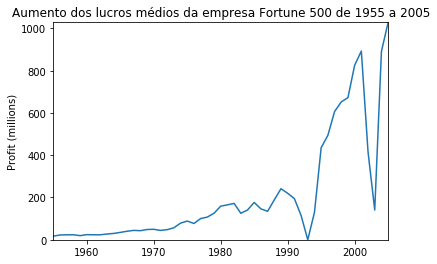

In [19]:
fig, ax = plt.subplots()
plot(x, y, ax, 'Aumento dos lucros médios da empresa Fortune 500 de 1955 a 2005', 'Profit (millions)')

a recessão do início dos anos 90 e a bolha das pontocom. É muito interessante ver isso nos dados. 

Mas como os lucros se recuperaram para níveis ainda mais altos depois de cada recessão?

Talvez as receitas possam nos dizer mais.

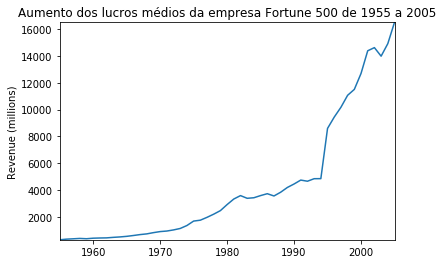

In [26]:
y2 = avgs.revenue
fig, ax = plt.subplots()
plot(x, y2, ax, 'Aumento dos lucros médios da empresa Fortune 500 de 1955 a 2005', 'Revenue (millions)')

Verificando o outro lado da história. As receitas não foram quase tão atingidas, isso é um ótimo trabalho de contabilidade dos departamentos financeiros.

/media/hamilton/Business/5amClub/servidor_ai/lib/python3.5/site-packages/ipykernel_launcher.py:7: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.

/media/hamilton/Business/5amClub/servidor_ai/lib/python3.5/site-packages/ipykernel_launcher.py:8: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.

/media/hamilton/Business/5amClub/servidor_ai/lib/python3.5/site-packages/ipykernel_launcher.py:9: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.

/media/hamilton/Business/5amClub/servidor_ai/lib/python3.5/site-packages/ipykernel_launcher.py:10: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



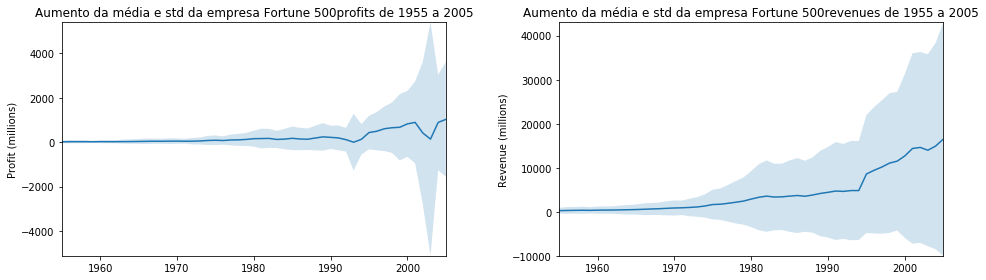

In [33]:
def plot_with_std(x, y, stds, ax, title, y_label):
    ax.fill_between(x, y - stds, y + stds, alpha=0.2)
    plot(x, y, ax, title, y_label)

fig, (ax1, ax2) = plt.subplots(ncols=2)
title = 'Aumento da média e std da empresa Fortune 500% s de 1955 a 2005'
stds1 = group_by_year.std().profit.as_matrix()
stds2 = group_by_year.std().revenue.as_matrix()
plot_with_std(x, y.as_matrix(), stds1, ax1, title % 'profits', 'Profit (millions)')
plot_with_std(x, y2.as_matrix(), stds2, ax2, title % 'revenues', 'Revenue (millions)')
fig.set_size_inches(14, 4)
fig.tight_layout()

Isso é impressionante, os desvios padrão são enormes. Algumas empresas da Fortune 500 ganham bilhões, enquanto outras perdem bilhões, e o risco aumentou junto com o aumento dos lucros ao longo dos anos. Talvez algumas empresas tenham um desempenho melhor que outras; Os lucros do top 10% são mais ou menos voláteis do que os 10% mais baixos?

Há muitas perguntas que poderíamos analisar em seguida e é fácil ver como o fluxo de trabalho em um bloco de anotações corresponde ao próprio processo de pensamento. Por isso, agora é hora de encerrar este exemplo. Esse fluxo nos ajudou a investigar facilmente nosso conjunto de dados em um único local sem alternar o contexto entre os aplicativos, e nosso trabalho é imediatamente compartilhável e reproduzível. Se quiséssemos criar um relatório mais conciso para um público específico, poderíamos refatorar rapidamente nosso trabalho mesclando células e removendo o código intermediário.

**Done**